# TITANIC :MACHINE LEARNING from Disaster

In [50]:
import pandas as pd

In [51]:
train=pd.read_csv('C:/Users/kanishk/Desktop/titanic data/train.csv')
test=pd.read_csv('C:/Users/kanishk/Desktop/titanic data/test.csv')

# Exploratory data analysis

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# data dictionary
survived:0 =No,1=Yes

pclass:Ticket class 1=1st,2=2nd,3=3rd

sibsp:# of siblings/spouses aboard the titanic

parch:#of parents/children aboard the titanic

ticket:ticket number

cabin:cabin number

embarked:Port of Embarkation 

C=Cherbourg,Q=Queenstown,S=Southampton

# total rows and columns

In [5]:
train.shape

(891, 12)

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.shape

(418, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()#setting seaborn default for plots

# bar chart for categorical features

.pclass

.sex

.sibSp

.parch

.embarked

.cabin

In [11]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=False,figsize=(10,5))

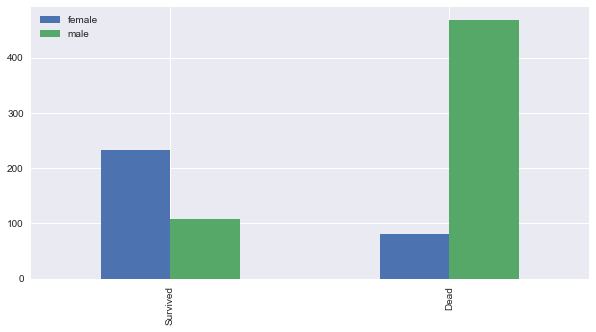

In [12]:
bar_chart('Sex')

this code confirms women more likely survived than men

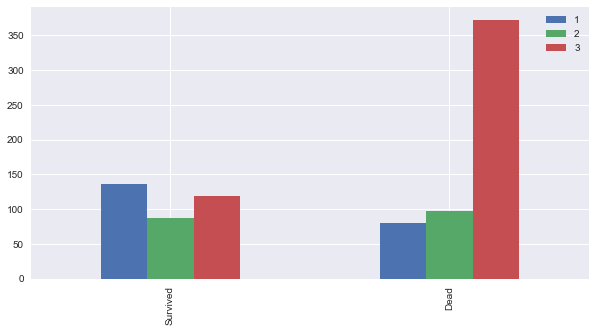

In [13]:
bar_chart('Pclass')

this chart confirms third class passengers died the most
and first  class survivers survived the most

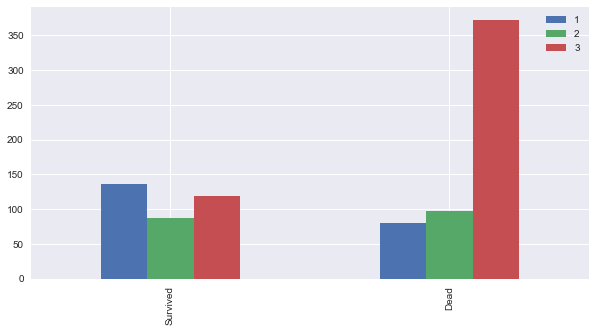

In [14]:
bar_chart('Pclass')

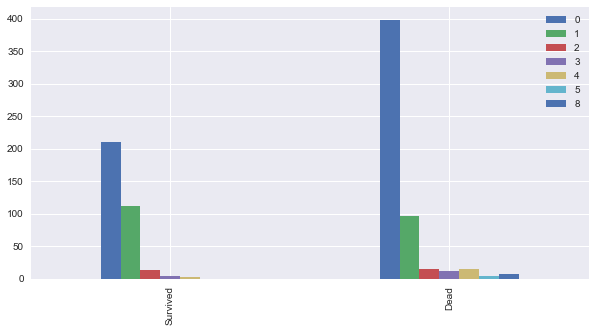

In [15]:
bar_chart('SibSp')

this shows one with no siblings or spouse most probably died

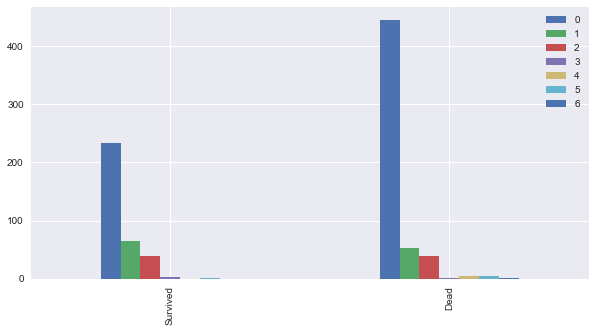

In [16]:
bar_chart('Parch')

this chart shows that a person who boarded alone with no parents or cchildren miost likely died

and a person who boarded with 2 or more children and parents survived

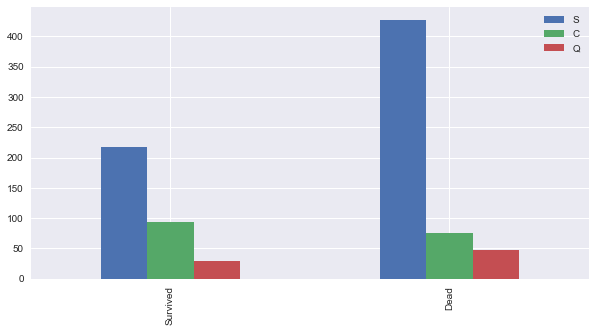

In [17]:
bar_chart('Embarked')

person who boarded from c survived
person boarded fromq more likely dead
person boarded from s more likely dead

# Feature engineering

In [18]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [53]:
train_test_data=[train,test]#combining train and test dataset
print(train_test_data)

[     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25         

In [54]:
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [55]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Lady          1
Capt          1
Don           1
Countess      1
Jonkheer      1
Sir           1
Mme           1
Name: Title, dtype: int64

# Title map
Mr : 0

Miss : 1

Mrs :2

Others:3

In [56]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


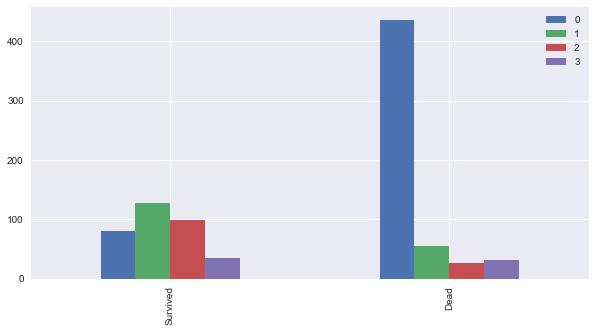

In [26]:
bar_chart('Title')

In [58]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

# Sex 
male:0
female:1

In [59]:
sex_mapping={"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

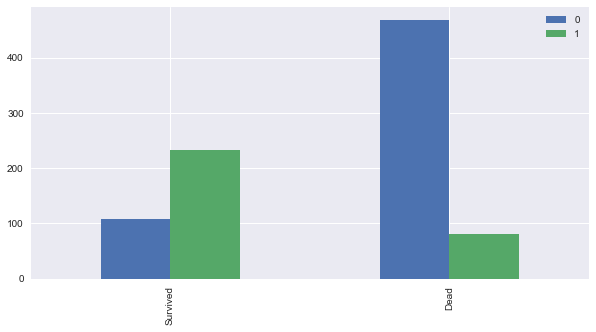

In [60]:
bar_chart('Sex')

# some age is missing

In [61]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.00,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.00,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.00,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.00,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.00,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.00,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.00,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.00,1,0,237736,30.0708,NaN,C,2


In [62]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [63]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

# 4.4.2 Binning

Binning/Converting Numerical Age to Categorical Variable

feature vector map:

child: 0

young: 1

adult: 2

mid-age: 3

senior: 4

In [64]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [65]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


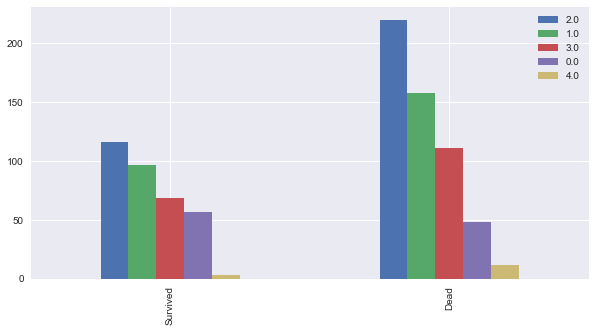

In [66]:
bar_chart('Age')

# 4.5 Embarked

In [67]:
#4.5.1 filling missing values

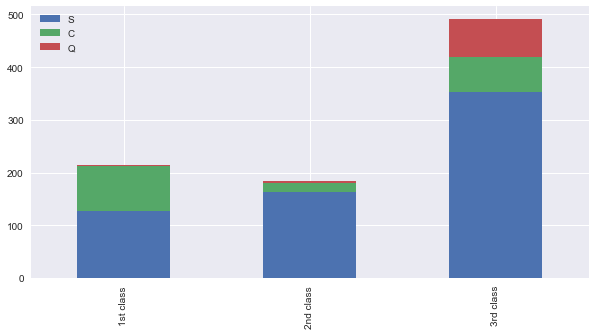

In [68]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [38]:
#fill out missing embark with S embark

In [69]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [70]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [72]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


# Fare

In [73]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


In [74]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [75]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


# 4.7 Cabin

In [76]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
F2             3
F33            3
D              3
E101           3
E25            2
B18            2
E8             2
B35            2
C124           2
C126           2
E24            2
C2             2
C68            2
B20            2
E44            2
D20            2
C65            2
D35            2
B22            2
D17            2
B58 B60        2
D36            2
C92            2
B5             2
B49            2
E33            2
              ..
B102           1
E77            1
D6             1
C82            1
A32            1
E46            1
B82 B84        1
C104           1
B42            1
C106           1
C91            1
C50            1
F E69          1
D30            1
B41            1
A6             1
C49            1
D11            1
B3             1
B71            1
B19            1
D15            1
B86            1
D47            1
C110           1
E68            1
C103           1
A7            

In [77]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

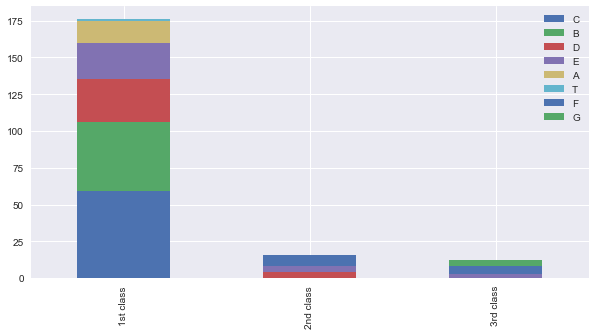

In [78]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [79]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [80]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [81]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [82]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [83]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [85]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

# 5.Modelling

In [87]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

# 6.2 Cross validation(K-fold)

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# 6.2.1 kNN

In [90]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [91]:
# kNN Score
round(np.mean(score)*100, 2)

82.6

# 6.2 kNN

In [92]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [93]:
# kNN Score
round(np.mean(score)*100, 2)

82.6

# 6.2.4 Naive bayes

In [94]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [95]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.78

# 6.2.5 SVM

In [96]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


In [101]:
round(np.mean(score)*100,2)

83.5

# TESTING

In [103]:
clf = KNeighborsClassifier()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [107]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('Submission.csv', index=False)


In [108]:
submission = pd.read_csv('Submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
